In [1]:
import pandas as pd
actor = pd.read_csv('data/actor.csv')
address = pd.read_csv('data/address.csv')
app_id = pd.read_csv('data/app_id.csv')
category = pd.read_csv('data/category.csv')
city = pd.read_csv('data/city.csv')
country = pd.read_csv('data/country.csv')
customer = pd.read_csv('data/customer.csv')
film_actor = pd.read_csv('data/film_actor.csv')
film_category = pd.read_csv('data/film_category.csv')
film = pd.read_csv('data/film.csv')
inventory = pd.read_csv('data/inventory.csv')
language = pd.read_csv('data/language.csv')
payment = pd.read_csv('data/payment.csv')
rental = pd.read_csv('data/rental.csv')
staff = pd.read_csv('data/staff.csv')
store = pd.read_csv('data/store.csv')

In [2]:
country.at[79,'country'] = 'Russia'

In [3]:
all_dfs = [
    actor, 
    address, 
    app_id, 
    category, 
    city, 
    country, 
    customer, 
    film_actor, 
    film_category, 
    film, 
    inventory, 
    language, 
    payment, 
    rental, 
    staff, 
    store
]
col = 'last_update'
for item in all_dfs:
    if col in item.columns:
        item.drop(col, axis=1, inplace=True)

In [4]:

p = pd.merge(payment[['payment_id', 'amount', 'customer_id']], customer[['customer_id', 'address_id']],'inner', 'customer_id')
p = pd.merge(p, address[['address_id', 'city_id']], 'inner', 'address_id')
p = pd.merge(p, city[['city_id', 'country_id']], 'inner', 'city_id')
p = pd.merge(p, country[['country_id', 'country']], 'inner', 'country_id')
a = p[['country', 'amount']].groupby(['country']).sum()


In [5]:
payment['amount'].sum()
p['amount'].sum()
p.columns

Index(['payment_id', 'amount', 'customer_id', 'address_id', 'city_id',
       'country_id', 'country'],
      dtype='object')

In [6]:
a.sort_values(by='amount', inplace=True, ascending=False)
#a

In [7]:
import matplotlib.pyplot as plt

In [8]:
amount = 10
a.iloc[:amount].sum()/a.sum() * 100

amount    51.661159
dtype: float64

Text(0, 0.5, 'Amount Spent')

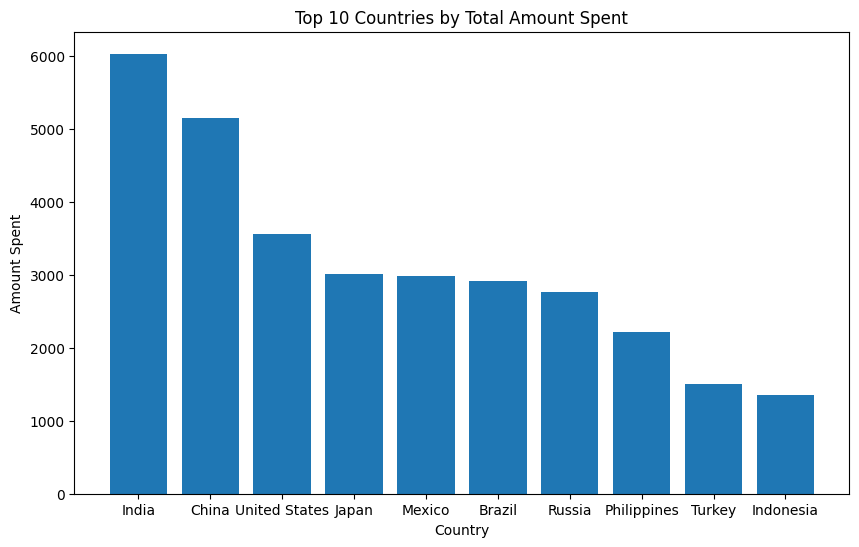

In [9]:
plt.figure(figsize=(10,6))
plt.bar(a.index.values[:amount], a['amount'].iloc[:amount], width=0.8)
plt.title('Top 10 Countries by Total Amount Spent')
plt.xlabel('Country')
plt.ylabel('Amount Spent')


In [10]:
pa = pd.merge(p, app_id, 'inner', 'customer_id')
pa.head()
#app_id.head()

,payment_id,amount,customer_id,address_id,city_id,country_id,country,android_id,apple_id
0,17503,7.99,341,346.0,151,67,Netherlands,Googl8720,NaN
1,17504,1.99,341,346.0,151,67,Netherlands,Googl8720,NaN
2,17505,7.99,341,346.0,151,67,Netherlands,Googl8720,NaN
3,17506,2.99,341,346.0,151,67,Netherlands,Googl8720,NaN
4,17507,7.99,341,346.0,151,67,Netherlands,Googl8720,NaN


In [11]:
app_country = pa[['country', 'android_id', 'apple_id']].groupby(['country']).count()
app_country1 = app_country.sort_values(by='android_id', ascending=False)
app_country2 = app_country.sort_values(by='apple_id', ascending=False)
print(app_country1.head())
print(app_country2.head())

               android_id  apple_id
country                            
India                 645       777
China                 624       652
United States         406       437
Mexico                314       404
Brazil                305       376
               android_id  apple_id
country                            
India                 645       777
China                 624       652
Japan                 276       443
United States         406       437
Russia                219       419


In [12]:
amount_cust = p[['country', 'customer_id']].groupby(['country']).nunique()
amount_cust.sum()

customer_id    596
dtype: int64

In [13]:
amount_cust.sort_values(by='customer_id', inplace=True, ascending=False)
amount = 10
amount_cust.iloc[:amount].sum()/amount_cust.sum() * 100

customer_id    52.348993
dtype: float64

Text(0, 0.5, 'Number of Customers')

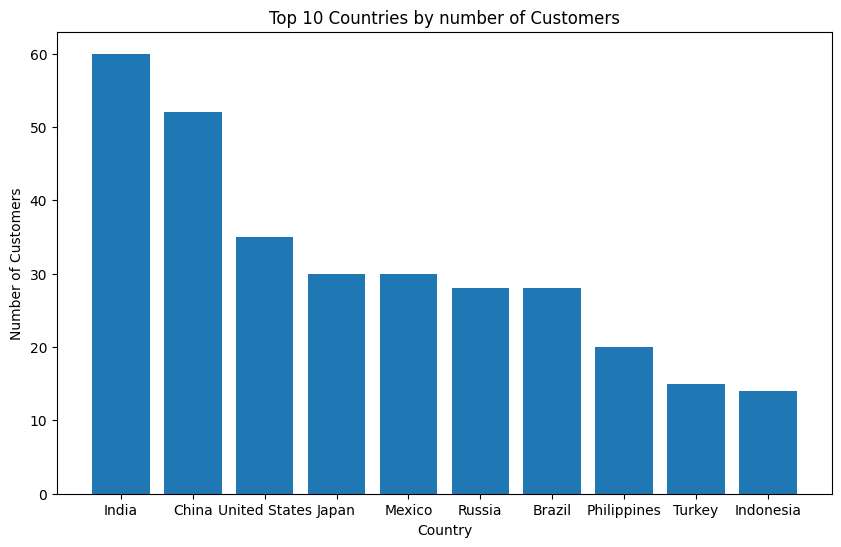

In [14]:
plt.figure(figsize=(10,6))
plt.bar(amount_cust.index.values[:amount], amount_cust['customer_id'].iloc[:amount], width=0.8)
plt.title('Top 10 Countries by number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

Text(0.5, 1.0, 'no of customers against total amount purchased')

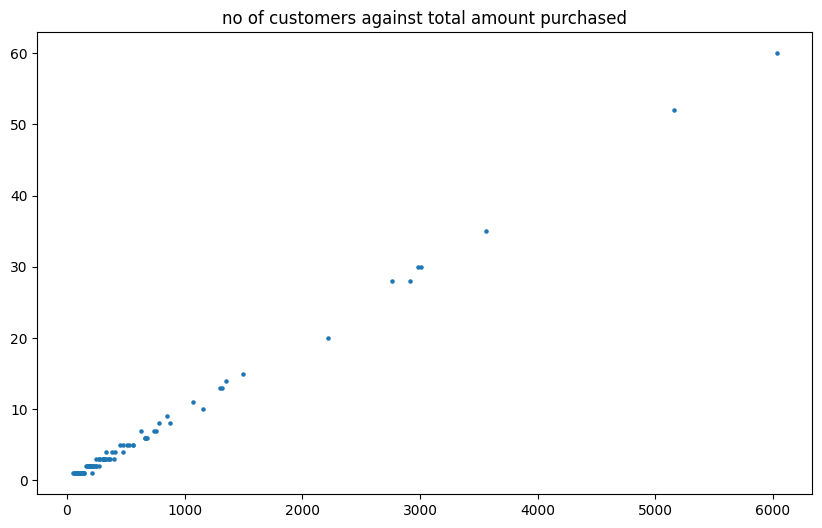

In [15]:
cust_purch = pd.merge(a, amount_cust, 'inner', 'country')
cust_purch.head()
plt.figure(figsize=(10,6))
plt.scatter(cust_purch['amount'], cust_purch['customer_id'], s=5)
plt.title('no of customers against total amount purchased')

In [48]:
country_film_actor = (
    film[['film_id', 'title', 'language_id']].merge(film_actor, 'inner', 'film_id')
    .merge(actor, 'inner', 'actor_id')
    .merge(inventory, 'inner', 'film_id')
    .merge(rental[['rental_id', 'customer_id', 'inventory_id']], 'inner', 'inventory_id')
    .merge(customer[['customer_id', 'address_id']], 'inner', 'customer_id')
    .merge(address[['address_id', 'city_id']], 'inner', 'address_id')
    .merge(city[['city_id', 'country_id']], 'inner', 'city_id')
    .merge(country[['country_id', 'country']], 'inner', 'country_id')
    .merge(film_category, 'inner', 'film_id')
    .merge(category, 'inner', 'category_id')
)

In [49]:
country_film_actor.head()

,film_id,title,language_id,actor_id,first_name,last_name,inventory_id,store_id,rental_id,customer_id,address_id,city_id,country_id,country,category_id,name
0,133,Chamber Italian,1,29,Alec,Wayne,612,1,4321,91,95.0,53,16,Brunei,12,Music
1,133,Chamber Italian,1,29,Alec,Wayne,612,1,10137,236,240.0,527,75,Philippines,12,Music
2,133,Chamber Italian,1,29,Alec,Wayne,612,1,14741,60,64.0,231,44,India,12,Music
3,133,Chamber Italian,1,29,Alec,Wayne,613,1,9481,481,486.0,347,93,Tanzania,12,Music
4,133,Chamber Italian,1,29,Alec,Wayne,613,1,11710,553,559.0,368,108,Yugoslavia,12,Music


In [40]:
country_film = country_film_actor[['country', 'film_id', 'title']].groupby('country').agg(lambda x: x.mode()[0])
country_film#.groupby('film_id').count()
#country_film.reset_index().groupby('film_id').count().sort_values('country', ascending=False)

,film_id,title
country,,
Afghanistan,529,Lonely Elephant
Algeria,385,Groundhog Uncut
American Samoa,347,Games Bowfinger
Angola,188,Crazy Home
Anguilla,67,Berets Agent
...,...,...
Vietnam,705,Purple Movie
"Virgin Islands, U.S.",1,Academy Dinosaur
Yemen,732,Rings Heartbreakers


In [44]:
country_actor = country_film_actor[['country', 'actor_id']].groupby('country').agg(lambda x: x.mode()[0])
country_actor.reset_index().groupby('actor_id').count().sort_values('country', ascending=False)

,country
actor_id,
107,7
60,4
119,3
20,3
65,3
...,...
161,1
167,1
192,1
